In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import keras
from sklearn.linear_model import LogisticRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
# # Preparing Training Data
# # data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\emtab_zscore (1).csv", delimiter="\t")
# data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Test & CV.csv", delimiter="\t")


# # data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\gse58208_zscore.csv", delimiter="\t")
# # data['disease.state.ch1'] = data['disease.state.ch1'].replace({
# #     'hepatocellular carcinoma': 1,
# #     'Chronic hepatitis B' : 2,
# #     'healthy control': 0
# # })

# X_train = data.iloc[:, :-1].values
# y_train = data.iloc[:, -1].values


# display(data)
# # print(X_train.shape)
# # print(y_train.shape)

# # Preparing Test and Cross Validate Data
# data = pd.read_csv(r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Train Data.csv")


# X_= data.iloc[:, :-1].values
# y_ = data.iloc[:, -1].values

# display(data)
# # print(X_)
# # print(y_)

# X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.5, random_state=1)


# print(f"Train: {X_train.shape}")
# print(f"CV: {X_cv.shape}")
# print(f"Test: {X_test.shape}")

In [ ]:
# # Load the dataset
# data_path = r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\2034_adjpv_auc.csv"
# data = pd.read_csv(data_path, delimiter="\t")

# # Separate features and label
# X = data.iloc[:, :-1]  # All features
# y = data.iloc[:, -1]   # Last column as target

# # Step 1: Split into 50% train and 50% temp with stratification
# X_train, X_temp, y_train, y_temp = train_test_split(
#     X, y, test_size=0.5, random_state=42, stratify=y)

# # Step 2: Split temp into 30% CV and 20% test (from 50% temp = 60/40 split)
# X_cv, X_test, y_cv, y_test = train_test_split(
#     X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)

# # === Print sizes and label distribution ===
# def describe_split(name, y_set):
#     print(f"{name} set: {len(y_set)} samples")
#     print(y_set.value_counts(normalize=True).rename(lambda v: f"  Class {v} ratio"))

# describe_split("Training", y_train)
# describe_split("Cross-Validation", y_cv)
# describe_split("Test", y_test)


In [7]:
# Load the dataset
data_path = r"C:\Users\Win\Documents\Github Workspace\Machine_Learning\Project\Machine Learning Cancer - Data - Sheet1.csv"
data = pd.read_csv(data_path, delimiter=",")

# Separate features and label
X = data.iloc[:, :-1]  # All features
y = data.iloc[:, -1]   # Last column as target

print(X)
print(y)

# # Step 1: Split into 50% train and 50% temp with stratification
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y)

# # Step 2: Split temp into 30% CV and 20% test (from 50% temp = 60/40 split)
X_cv, X_test, y_cv, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=42, stratify=y_temp)

# # === Print sizes and label distribution ===
def describe_split(name, y_set):
    print(f"{name} set: {len(y_set)} samples")
    print(y_set.value_counts(normalize=True).rename(lambda v: f"  Class {v} ratio"))

describe_split("Training", y_train)
describe_split("Cross-Validation", y_cv)
describe_split("Test", y_test)


     201506_at  205486_at  216638_s_at  221619_s_at  221672_s_at  35148_at
0     0.045283   0.088809     0.359098     0.015206    -0.912406 -1.800676
1    -0.875976  -0.041301    -0.111223     1.714917    -0.797470 -1.827605
2     0.223085   0.302113    -0.735687     0.131239    -1.416955  2.223924
3     0.358691  -0.115612    -0.585816     1.431602    -1.310635  1.830601
4     0.789431   0.038531    -1.340381    -0.756025     0.156410 -0.409375
..         ...        ...          ...          ...          ...       ...
357   0.949216  -0.344587    -0.185997     1.200971    -1.214392 -1.807650
358   0.632842   1.759387     1.620833    -0.697866     0.004233  1.224772
359  -1.187681  -1.221904    -1.319973    -1.486159     0.195725  0.075763
360   0.701818   0.278702     0.575100     0.047320     1.562932  0.313691
361  -1.320931  -0.463715    -0.461624     0.927184     0.394237  0.330682

[362 rows x 6 columns]
0      1
1      1
2      0
3      1
4      1
      ..
357    4
358    4
359 

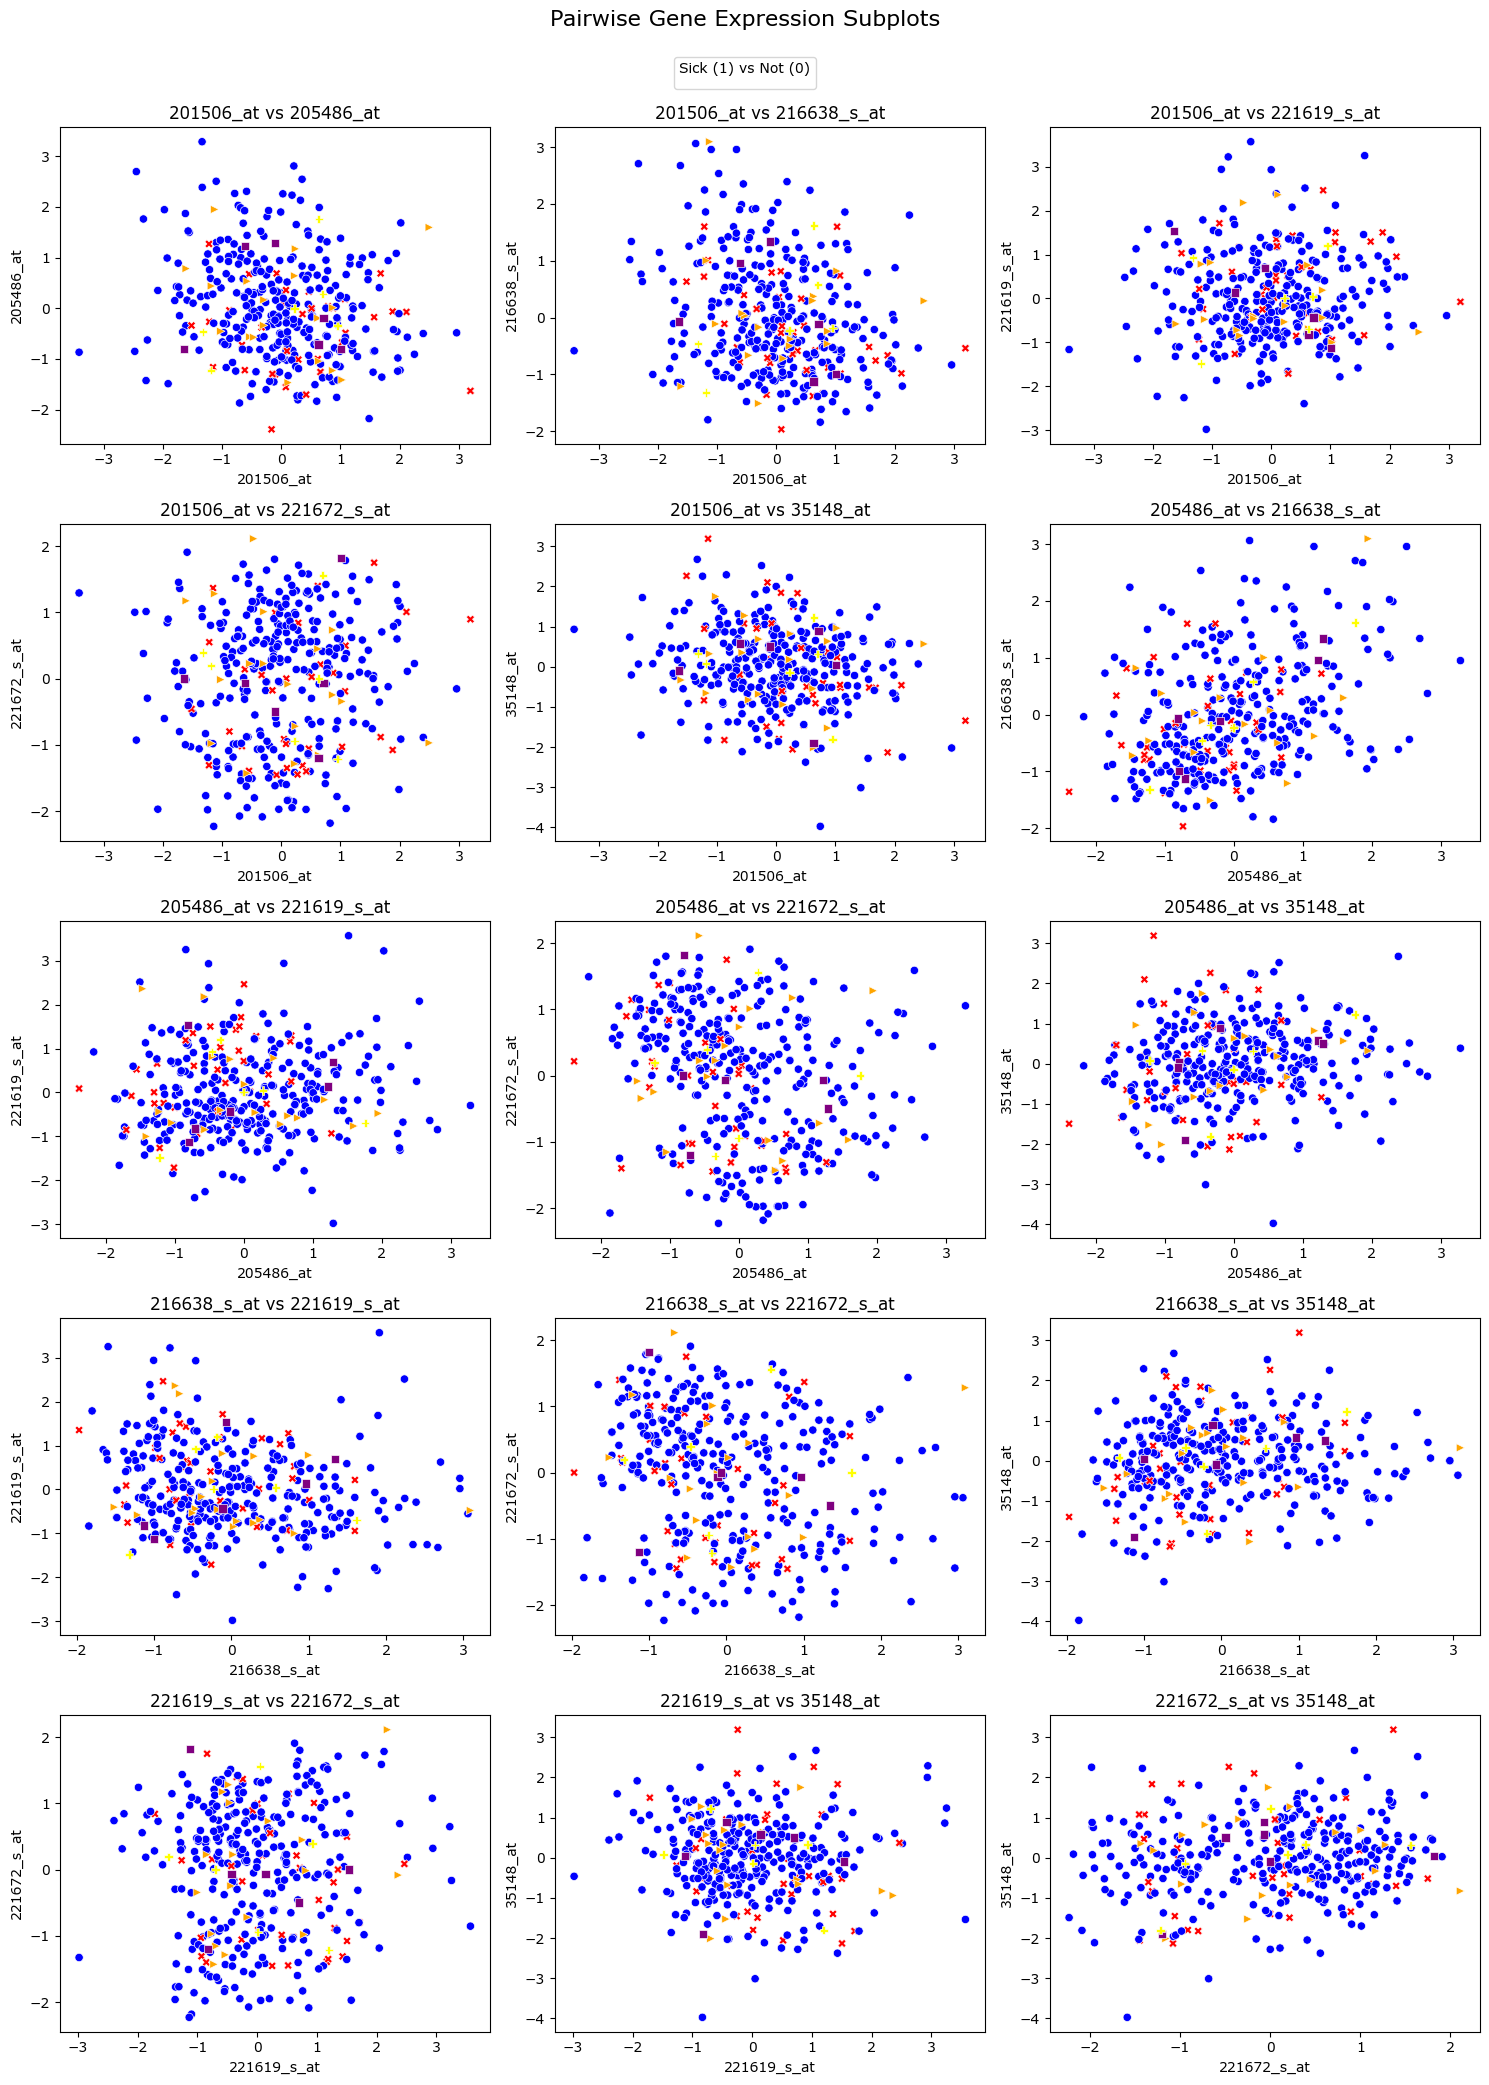

In [9]:
features = data.columns[:-1]  # All gene expression columns
label = data.columns[-1]      # 'relapse..1.True.'

# Generate all unique gene pairs
combs = list(combinations(features, 2))
num_plots = len(combs)

# Determine subplot grid size (e.g., 5 rows × 3 columns for 15 plots)
cols = 3
rows = (num_plots + cols - 1) // cols

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Plot each gene pair in a  subplot
for i, (x_gene, y_gene) in enumerate(combs):
    ax = axes[i]
    sns.scatterplot(
        data=data,
        x=x_gene,
        y=y_gene,
        hue=label,
        style=label,
        markers={0: 'o', 1: 'X', 2: '>', 3:'s', 4:'P'},
        palette={0: 'blue', 1: 'red', 2: 'orange', 3: 'purple', 4: 'yellow'},
        ax=ax,
        legend=False  # Disable legend for individual plots
    )
    ax.set_title(f"{x_gene} vs {y_gene}")
    ax.set_xlabel(x_gene)
    ax.set_ylabel(y_gene)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add one legend for the whole figure
handles, labels_ = ax.get_legend_handles_labels()
fig.legend(handles, labels_, title='Sick (1) vs Not (0)', loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=2)

plt.tight_layout()
plt.suptitle("Pairwise Gene Expression Subplots", y=1.04, fontsize=16)
plt.show()


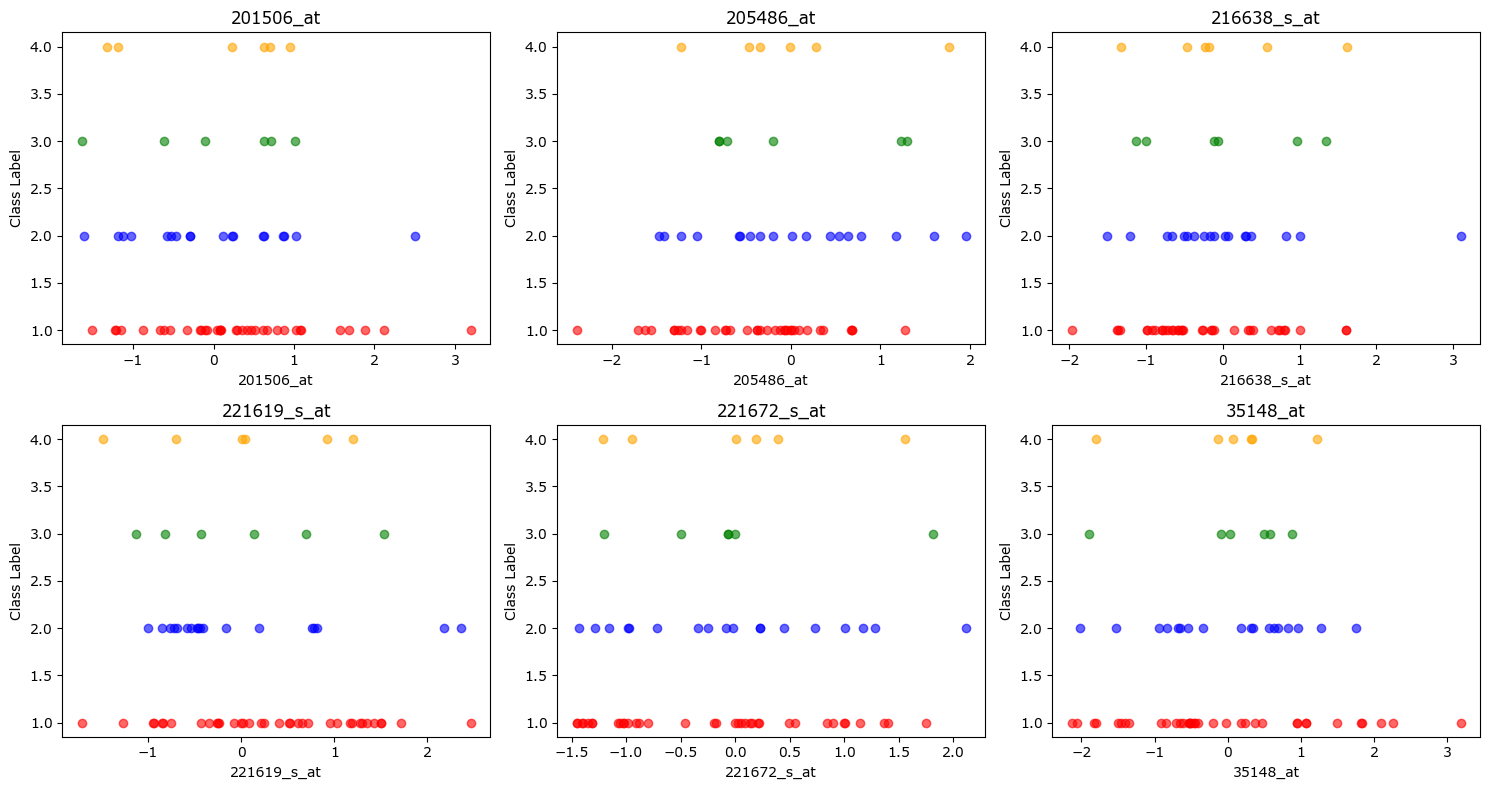

5


In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15, 8))  # Adjust to match number of features
m = 5

# Define color map for labels 1–4
colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'orange'}

for i, axes in enumerate(ax.flat):
    x = data[data.columns[i]]
    y = data[data.columns[-1]]  # Label column
    label = data[data.columns[-1]]  # Ensure correct labels for coloring

    axes.set_title(data.columns[i])

    # Plot each point colored by label
    for label_value in sorted(colors.keys()):
        idx = label == label_value
        axes.scatter(x[idx], [label_value] * sum(idx), 
                     color=colors[label_value], 
                     label=f'Class {label_value}', alpha=0.6)

    axes.set_xlabel(data.columns[i])
    axes.set_ylabel("Class Label")
    # axes.legend()

plt.tight_layout()
plt.show()
print(m)

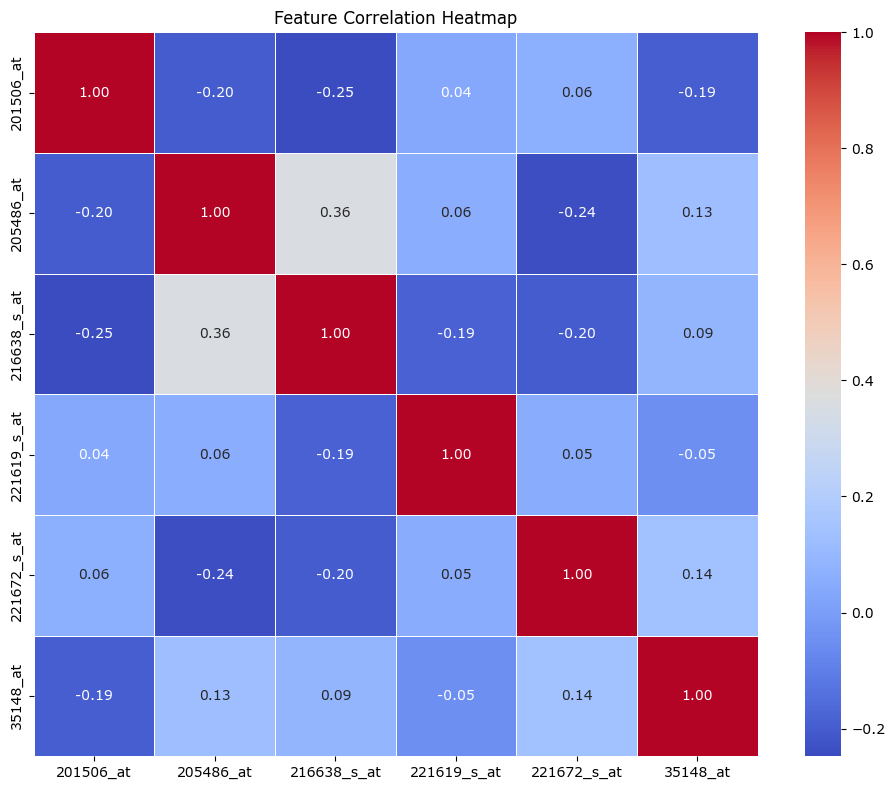

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop label column to only include features
features_only = data.iloc[:, :-1]  # assuming last column is the label

# Compute the correlation matrix
corr_matrix = features_only.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

C:\Users\Win\AppData\Local\Temp\ipykernel_6296\4227516894.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Win\AppData\Local\Temp\ipykernel_6296\4227516894.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Win\AppData\Local\Temp\ipykernel_6296\4227516894.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
C:\Users\Win\AppData\Local\Temp\ipykernel_6296\4227516894.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue`

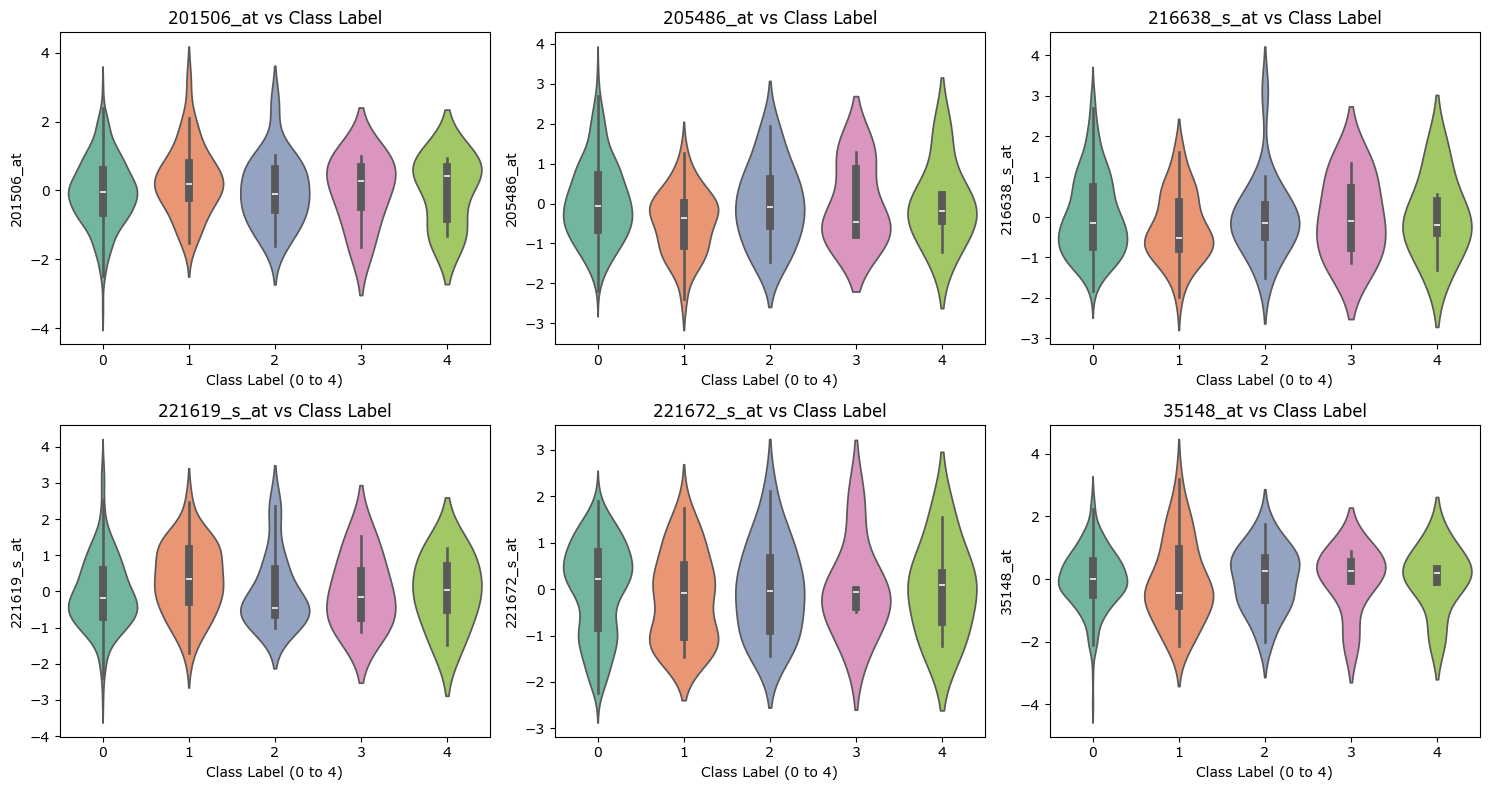

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the last column is the label (0 to 4)
label_col = data.columns[-1]
feature_cols = data.columns[:-1]

# Set up subplot grid
n_features = len(feature_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, feature in enumerate(feature_cols):
    sns.violinplot(
        data=data,
        x=label_col,
        y=feature,
        ax=axes[i],
        palette="Set2",
        inner="box"  # also shows boxplot inside the violin
    )
    axes[i].set_title(f"{feature} vs Class Label")
    axes[i].set_xlabel("Class Label (0 to 4)")
    axes[i].set_ylabel(feature)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
